In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'data_1400.xlsx')
df.head()

,DATE_S,ID,SH_GHABZ,ID_AREA,ID_DAY,ID_SUBAREA,TARF,FAZ,AMPER,OFFICE,DEMANDG,ZAR,CNTN1,ZONE,USE1,USE2,USE3
0,14000803,811515639,1176899012121,640,23,3,10102113,1,25,99999,5,1.0,33535563.0,0,25.0,11.0,10.0
1,14000609,811568868,1178469312124,3020,28,2,10102113,1,25,99999,5,1.0,33537423.0,0,110.0,42.0,59.0
2,14001012,811568916,1178470912127,3020,31,1,10102113,1,25,99999,5,1.0,45958.0,0,165.0,66.0,69.0
3,14000303,811568916,1178470912127,3020,31,1,10102113,1,25,99999,5,1.0,45958.0,0,188.0,74.0,106.0
4,14000504,811568941,1178471812126,3020,9,1,10102113,1,25,99999,5,1.0,50620.0,0,192.0,77.0,83.0


In [ ]:
df[[]]

In [6]:
df.shape

(158237, 17)

In [8]:
consumer_idx = df['TARF'].astype('str').str.startswith('1')
df = df.loc[consumer_idx]
df.shape

(129756, 17)

In [11]:
(df['USE1'] > 0) & (df['USE3'] > 0)

0          True
1          True
2          True
3          True
4          True
          ...  
158228    False
158229    False
158233     True
158235    False
158236    False
Length: 129756, dtype: bool

In [12]:
df.dtypes

DATE_S          int64
ID              int64
SH_GHABZ        int64
ID_AREA         int64
ID_DAY          int64
ID_SUBAREA      int64
TARF            int64
FAZ             int64
AMPER           int64
OFFICE          int64
DEMANDG         int64
ZAR           float64
CNTN1         float64
ZONE            int64
USE1          float64
USE2          float64
USE3          float64
dtype: object

In [19]:
df[df['ID']==811515639][['DATE_S']+[f'USE{i}' for i in (1,2,3)]]

,DATE_S,USE1,USE2,USE3
0,14000803,25.0,11.0,10.0
29705,14000406,104.0,22.0,16.0
108579,14000219,52.0,43.0,36.0
128465,14001217,62.0,44.0,67.0
128466,14001001,86.0,67.0,91.0
138229,14000601,94.0,5.0,11.0


In [21]:
df[df['ID']==811515639][['DATE_S']+[f'USE{i}' for i in (1,2,3)]].sort_values('DATE_S')

,DATE_S,USE1,USE2,USE3
108579,14000219,52.0,43.0,36.0
29705,14000406,104.0,22.0,16.0
138229,14000601,94.0,5.0,11.0
0,14000803,25.0,11.0,10.0
128466,14001001,86.0,67.0,91.0
128465,14001217,62.0,44.0,67.0


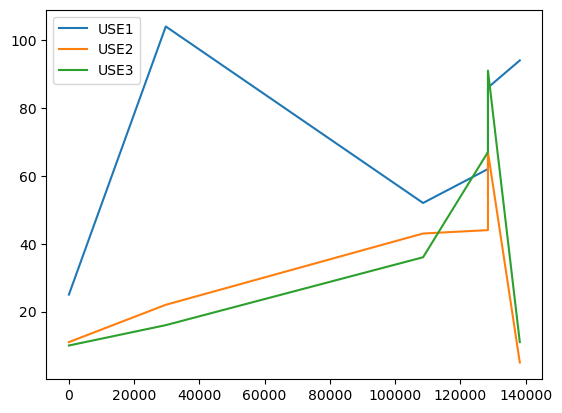

In [17]:
df[df['ID']==811515639][[f'USE{i}' for i in (1,2,3)]].plot()
plt.legend()

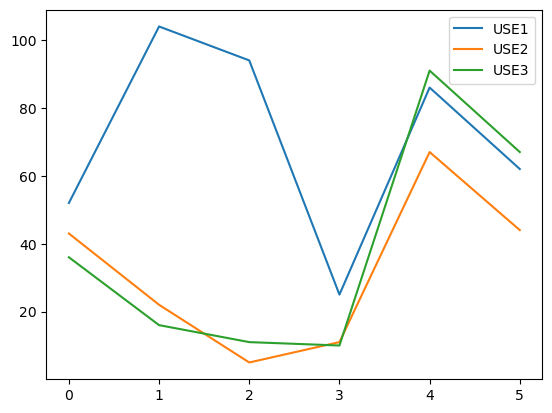

In [23]:
df[df['ID']==811515639][['DATE_S']+[f'USE{i}' for i in (1,2,3)]].sort_values('DATE_S').reset_index()[[f'USE{i}' for i in (1,2,3)]].plot()
plt.legend()

In [24]:
selected_data = df[df['ID']==811515639][['DATE_S']+[f'USE{i}' for i in (1,2,3)]].sort_values('DATE_S').reset_index()[[f'USE{i}' for i in (1,2,3)]]
selected_data

,USE1,USE2,USE3
0,52.0,43.0,36.0
1,104.0,22.0,16.0
2,94.0,5.0,11.0
3,25.0,11.0,10.0
4,86.0,67.0,91.0
5,62.0,44.0,67.0


In [32]:
rolled = selected_data['USE1'].rolling(3).median()
selected_data['USE1_med'] = rolled
selected_data['USE1_med'].shift(+1)
selected_data

,USE1,USE2,USE3,USE1_med
0,52.0,43.0,36.0,NaN
1,104.0,22.0,16.0,NaN
2,94.0,5.0,11.0,94.0
3,25.0,11.0,10.0,94.0
4,86.0,67.0,91.0,86.0
5,62.0,44.0,67.0,62.0


In [37]:
selected_data['USE1_baseline'] = selected_data['USE1'].shift(+1)
selected_data

,USE1,USE2,USE3,USE1_med,USE1_baseline
0,52.0,43.0,36.0,NaN,NaN
1,104.0,22.0,16.0,NaN,52.0
2,94.0,5.0,11.0,94.0,104.0
3,25.0,11.0,10.0,94.0,94.0
4,86.0,67.0,91.0,86.0,25.0
5,62.0,44.0,67.0,62.0,86.0


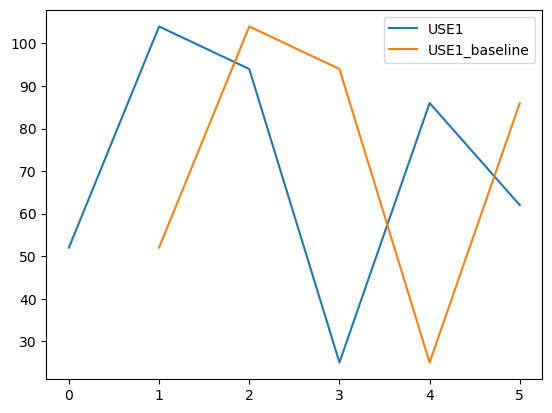

In [39]:
selected_data[['USE1','USE1_baseline']].plot()
plt.legend()

In [40]:
!pip install skforecast
# !conda install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.8/343.8 kB 1.0 MB/s eta 0:00:001.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 4.2 MB/s eta 0:00:004.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 3.8 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 3.3 MB/s eta 0:00:00


In [41]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [42]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [46]:
mean_absolute_error(selected_data['USE1'],selected_data['USE1_baseline'].fillna(0))

44.666666666666664

In [47]:
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import StandardScaler

In [49]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=110),
                 lags          = 3,
                 transformer_y = StandardScaler()
             )

forecaster.fit(y=selected_data['USE1'])
forecaster

ForecasterAutoreg 
Regressor: Ridge(random_state=110) 
Lags: [1 2 3] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Window size: 3 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 5] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': 110, 'solver': 'auto', 'tol': 0.001} 
Creation date: 2023-04-30 11:31:50 
Last fit date: 2023-04-30 11:31:50 
Skforecast version: 0.7.0 
Python version: 3.10.9 
Forecaster id: None 

In [50]:
metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = selected_data.USE1,
#                           initial_train_size = len(data.loc[:end_validation]),
#                           fixed_train_size   = False,
                          steps              = 3,
                          metric             = 'mean_absolute_error',
                          verbose            = True
                      )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 3
Number of observations used for backtesting: 3
    Number of folds: 1
    Number of steps per fold: 3

Data partition in fold: 0
    Training:   0 -- 2  (n=3)
    Validation: 3 -- 5  (n=3)



In [51]:
metric

4.585274425154442

In [52]:
predictions

,pred
3,30.376243
4,79.064528
5,63.444108


In [53]:
selected_data['USE1']

0     52.0
1    104.0
2     94.0
3     25.0
4     86.0
5     62.0
Name: USE1, dtype: float64

In [54]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


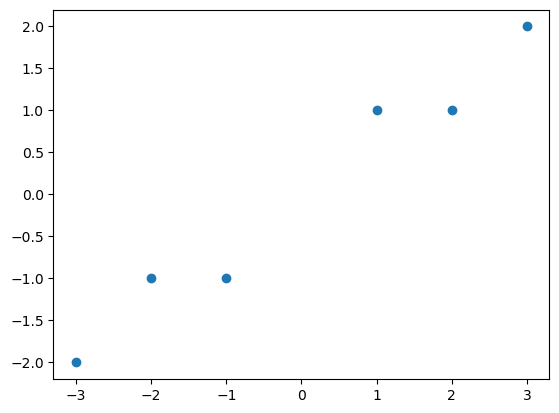

In [56]:
plt.scatter(X[:,0], X[:,1])

In [57]:
columns = ['ID'] + [[f'USE{i}_GH_{j}' for i in range(1,4)] for j in range(1,7)]
columns

['ID',
 ['USE1_GH_1', 'USE2_GH_1', 'USE3_GH_1'],
 ['USE1_GH_2', 'USE2_GH_2', 'USE3_GH_2'],
 ['USE1_GH_3', 'USE2_GH_3', 'USE3_GH_3'],
 ['USE1_GH_4', 'USE2_GH_4', 'USE3_GH_4'],
 ['USE1_GH_5', 'USE2_GH_5', 'USE3_GH_5'],
 ['USE1_GH_6', 'USE2_GH_6', 'USE3_GH_6']]

['ID', 'DATE_S', 'USE1', 'USE2', 'USE3']

In [62]:
data = df[['ID']+['DATE_S']+[f'USE{i}' for i in (1,2,3)]].sort_values(['ID','DATE_S']).reset_index()

In [66]:
data = data.drop(columns=['index'], axis=1)
data.head()

,ID,DATE_S,USE1,USE2,USE3
0,111393876,14000131,269.0,0.0,0.0
1,111393876,14000322,335.0,0.0,0.0
2,111393876,14000510,493.0,0.0,0.0
3,111393876,14000711,531.0,0.0,0.0
4,111393876,14000909,255.0,0.0,0.0


In [73]:
mid1 = pd.melt(data, id_vars=['ID','DATE_S'], value_vars=('USE1','USE2','USE3'))
mid1.head()

,ID,DATE_S,variable,value
0,111393876,14000131,USE1,269.0
1,111393876,14000322,USE1,335.0
2,111393876,14000510,USE1,493.0
3,111393876,14000711,USE1,531.0
4,111393876,14000909,USE1,255.0


In [75]:
data.head()

,ID,DATE_S,USE1,USE2,USE3
0,111393876,14000131,269.0,0.0,0.0
1,111393876,14000322,335.0,0.0,0.0
2,111393876,14000510,493.0,0.0,0.0
3,111393876,14000711,531.0,0.0,0.0
4,111393876,14000909,255.0,0.0,0.0


In [87]:
final_data = {}
for row in data.iterrows():
    ID = row[1]['ID']
    if ID not in final_data:
        final_data[ID]=[]
    DATE_S = row[1]['ID']
    USE1 = row[1]['USE1']
    USE2 = row[1]['USE2']
    USE3 = row[1]['USE3']
    final_data[ID].append((USE1, USE2, USE3))

In [88]:
final_data

{111393876.0: [(269.0, 0.0, 0.0),
  (335.0, 0.0, 0.0),
  (493.0, 0.0, 0.0),
  (531.0, 0.0, 0.0),
  (255.0, 0.0, 0.0),
  (206.0, 0.0, 0.0)],
 111393885.0: [(213.0, 0.0, 0.0),
  (296.0, 0.0, 0.0),
  (435.0, 0.0, 0.0),
  (435.0, 0.0, 0.0),
  (274.0, 0.0, 0.0),
  (158.0, 0.0, 0.0)],
 111394917.0: [(0.0, 0.0, 0.0),
  (327.0, 0.0, 0.0),
  (188.0, 0.0, 0.0),
  (226.0, 0.0, 0.0),
  (178.0, 0.0, 0.0),
  (185.0, 0.0, 0.0)],
 111394935.0: [(486.0, 0.0, 0.0),
  (399.0, 0.0, 0.0),
  (461.0, 0.0, 0.0),
  (396.0, 0.0, 0.0),
  (352.0, 0.0, 0.0),
  (329.0, 0.0, 0.0)],
 111471874.0: [(94.0, 39.0, 85.0),
  (136.0, 49.0, 72.0),
  (66.0, 21.0, 49.0),
  (124.0, 31.0, 71.0),
  (121.0, 23.0, 70.0),
  (109.0, 20.0, 61.0)],
 111471899.0: [(387.0, 66.0, 211.0),
  (274.0, 97.0, 244.0),
  (315.0, 153.0, 221.0),
  (334.0, 159.0, 292.0),
  (264.0, 126.0, 243.0),
  (237.0, 123.0, 203.0)],
 111471918.0: [(73.0, 28.0, 70.0),
  (71.0, 31.0, 66.0),
  (92.0, 28.0, 54.0),
  (93.0, 31.0, 62.0),
  (56.0, 23.0, 33.0),
  (68.0

In [126]:
processed_data = []
for key in final_data:
    val = final_data[key]
    j = []
    for i in val:
        j.extend(i)
    if (len(j) != 18):
        print('*', end='')
        continue
    abcd = [key] + j
    processed_data.append(abcd)

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

In [127]:
len(processed_data)

18662

In [128]:
processed_data = np.asarray(processed_data)
processed_data.shape

(18662, 19)

In [129]:
from sklearn.cluster import DBSCAN

In [139]:
clf = DBSCAN(min_samples=5, eps=0.02)

In [140]:
clf.fit(processed_data)

DBSCAN(eps=0.02)

In [141]:
clustering = clf.labels_

In [143]:
clustering

array([-1, -1, -1, ..., -1, -1, -1])

(array([1.8654e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 10 artists>)

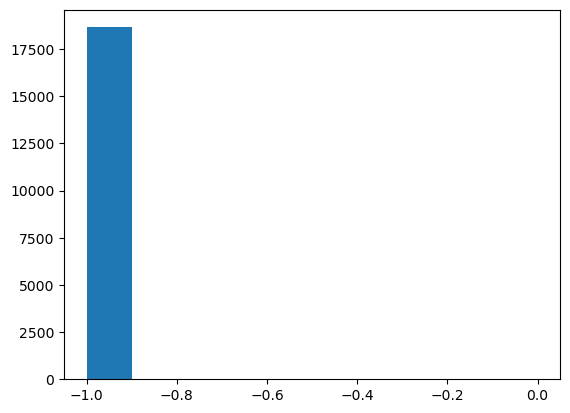

In [142]:
plt.hist(clustering)